In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.lines as mlines

In [2]:
k = 10
cols=['alpha', 'm0'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

In [9]:
k = 10
cols=['alpha', 'm0'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

activ_function = ['relu','sign']
m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'D', 'D']
alpha_list = np.linspace(1.0,0.8, 5)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = "Random Init "
LD_name_init_planted = "Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.7
linewidth_theory_vertical = linewidth_theory
fontsize=13
color_num="white"
color_num_planted="orange"
#vertical_line_color="magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []
plot_activ_function=True
GD_exist = True
GD_indice = 4
#1.235, 1.12



planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'erf':1.5, 'relu':1.2}
alpha_first_t = {'erf':0.8, 'relu':1.1}

with_overlap = False
name_file_pdf = f"zeroTermperature_relu_sign_classification_with_overlap_{with_overlap}"

# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
#alpha_first_t = 0.85
y1_max=1.0
y1_min=-0.01
y_min=1.1e-2
y_max=1e0
x_min=0.2
x_max=15.1

#yline = np.linspace(y_min, y_max, 900)  # Define y-axis range

#colors = np.where(yline < 0.2, vertical_line_color, np.where(yline < 0.4, error_color, vertical_line_color))

#vertical_line = {"erf":[1e-3+1.19e-4, 1e-2], "relu":[1e-2, 1e-1-0.02]}
#ax1.set_xlabel(r'$\tilde{\alpha}$')
#ax1.set_ylabel(r'$\epsilon_g$')
# -- Transition -- 
#plt.axvline(12.23, color= 'lightgray')

# Plot on ax1 - ERROR
# -- non specialized sol -- 

In [23]:
activ_function = ['relu','sign']

GD
17
GD


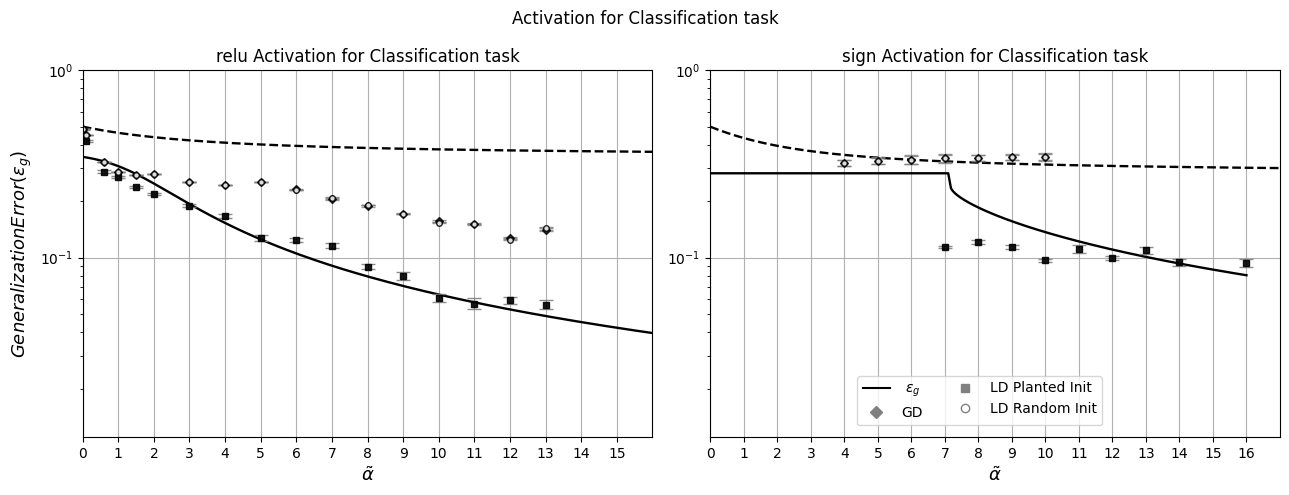

In [28]:
fig, axes = plt.subplots(1, len(activ_function), figsize=(13, 5))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})

for i, key in enumerate(activ_function):
    
    if key=="sign":
            #x_max=max(error_0['alpha'])-160
            x_max=17
            print(x_max)
    else:
        x_max=max(error_1['alpha'])
            
    x_ticks = np.arange(0, x_max, 1)
    if len(activ_function)>1:
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
    else:
        ax1=axes
        ax1.set_ylim(y_min, y_max)
        
    #Limit x-axis
    ax1.set_xlim(x_min, x_max)
    
    # Add Generalization error
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
        
    #THEORY 
    root="betainf_lambda0p0classification"
    Th_directory = f"{key}_{root}/Theory/"
        
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None, sep=' ')
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None, sep=' ')
    
    
    # EXPERIMENTS
    Ex_directory = f"{key}_{root}/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt',sep=' ', names=colsN, header=None)
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt',sep=' ', names=colsN, header=None)
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt',sep=' ', names=colsN, header=None)

    
    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    
    
    #Theoretical Data
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None,sep=' ')
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None,sep=' ')
    spe_error = ax1.semilogy(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    spe_error_2 = ax1.semilogy(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    
    
    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'], error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=error_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
            
    error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
                                capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    
    
    ax1.tick_params(axis='y')
    if i == 0:
        ax1.set_ylabel(r'$Generalization Error (ε_g)$',fontsize=fontsize)
    
        
    
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        
        ax2.set_ylim(y1_min, y1_max)
        ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$',fontsize=fontsize)
        
        # -- specialized sol -- 
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'], '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
            
        
        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        
        if i == 0:
            legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($ε_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            
    ax1.set_xlabel(r'$\tilde{\alpha}$', fontsize=fontsize)
    ax1.set_label("")
    ax1.set_xticks(x_ticks)
    ax1.grid(True)
    name = f"{key} Activation for Classification task"
    ax1.set_title(f"{name}")

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.3)

legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g$'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[GD_indice], linestyle='None', label=r'GD'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]

# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle
name = f"Activation for Classification task"
plt.suptitle(f"{name}")

plt.legend(handles, labels, ncol=2, frameon=True, loc='right', bbox_to_anchor=(0.7, 0.1))

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

# Save figure
plt.savefig(f"{name_file_pdf}_classification.pdf", bbox_inches='tight', dpi=300)
plt.show()